<a href="https://colab.research.google.com/github/Loomer/2022-itc303-team08/blob/ml-manu/ml_manu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone -b ml-manu https://github.com/Loomer/2022-itc303-team08

Cloning into '2022-itc303-team08'...
remote: Enumerating objects: 2684, done.
remote: Counting objects: 100% (309/309), done.
remote: Compressing objects: 100% (305/305), done.
remote: Total 2684 (delta 5), reused 308 (delta 4), pack-reused 2375
Receiving objects: 100% (2684/2684), 532.18 MiB | 27.50 MiB/s, done.
Resolving deltas: 100% (95/95), done.
Checking out files: 100% (1404/1404), done.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
import numpy as np 
import matplotlib.pyplot as pypt 
import cv2
import os 

994


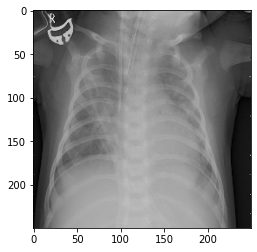

In [4]:
image_set = "/content/2022-itc303-team08/images/train"
imageType = ["COVID", "NORMAL"]
train_set = []
train_labels = []

def create_train_data():
  for imgType in imageType: 

    link = os.path.join(image_set, imgType)  
    
        
    for img in os.listdir(link): 
      if img == "Thumbs.db":
        continue 
      img_array = cv2.imread(os.path.join(link, img))  
      new_img_array = cv2.resize(img_array, (250, 250))  
      train_set.append(new_img_array)
      train_labels.append(imageType.index(imgType)) 

create_train_data()
print(len(train_set))
pypt.imshow(train_set[0])

In [5]:
train_set = np.array(train_set)
train_labels = np.array(train_labels)
train_set = train_set/255.0

In [6]:
def create_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(250, 250, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)])
  
  
  model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [7]:
model = create_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 476288)            0         
                                                                 
 dropout (Dropout)           (None, 476288)            0

In [8]:
validation_set = []
validation_labels = []

val_image_set = "/content/2022-itc303-team08/images/val"

def create_validation_data():
  for imgType in imageType: 

    link = os.path.join(val_image_set, imgType)  
        
    for img in os.listdir(link): 
      if img == "Thumbs.db":
        continue 
      test_img_array = cv2.imread(os.path.join(link, img))  
      new_test_array = cv2.resize(test_img_array, (250, 250)) 
      validation_set.append(new_test_array)
      validation_labels.append(imageType.index(imgType)) 

create_validation_data()
print(len(validation_set))
print(validation_labels)

198
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [9]:
validation_set = np.array(validation_set)
validation_labels = np.array(validation_labels)
validation_set = validation_set/255.0

model.evaluate(validation_set, validation_labels)

7/7 [==============================] - 14s 2s/step - loss: 0.6892 - accuracy: 0.5051


[0.6891782879829407, 0.5050504803657532]

In [10]:
checkpoint_path = "2022-itc303-team08/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [11]:
checkpoint_path = "2022-itc303-team08/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose =1, period = 5)

new_model = create_model()

new_model.fit(train_set, train_labels, epochs=10, validation_data = (validation_set, validation_labels), callbacks = [cp_callback])

Epoch 1/10
32/32 [==============================] - 295s 9s/step - loss: 4.3781 - accuracy: 0.5845 - val_loss: 0.4934 - val_accuracy: 0.8182
Epoch 2/10
32/32 [==============================] - 298s 9s/step - loss: 0.3347 - accuracy: 0.8612 - val_loss: 0.3408 - val_accuracy: 0.8737
Epoch 3/10
32/32 [==============================] - 309s 10s/step - loss: 0.1396 - accuracy: 0.9447 - val_loss: 0.2249 - val_accuracy: 0.9141
Epoch 4/10
32/32 [==============================] - 300s 9s/step - loss: 0.0960 - accuracy: 0.9618 - val_loss: 0.2051 - val_accuracy: 0.9242
Epoch 5/10
32/32 [==============================] - ETA: 0s - loss: 0.0976 - accuracy: 0.9537
Epoch 5: saving model to 2022-itc303-team08/cp.ckpt
32/32 [==============================] - 315s 10s/step - loss: 0.0976 - accuracy: 0.9537 - val_loss: 0.2596 - val_accuracy: 0.8990
Epoch 6/10
32/32 [==============================] - 299s 9s/step - loss: 0.0792 - accuracy: 0.9718 - val_loss: 0.2718 - val_accuracy: 0.9192
Epoch 7/10
32/32 

In [27]:
model.load_weights(checkpoint_path)
loss, acc = model.evaluate(validation_set, validation_labels)
print(loss, acc)

7/7 [==============================] - 14s 2s/step - loss: 0.1994 - accuracy: 0.9293
0.19942446053028107 0.9292929172515869


In [ ]:
#prediction = model.predict(validation_set)
#print(prediction)

[[1.0000000e+00 2.9481945e-13]
 [1.0000000e+00 4.2141216e-17]
 [1.0000000e+00 1.5730692e-17]
 [9.9999988e-01 1.3205140e-07]
 [1.0000000e+00 1.9746350e-19]
 [5.8624146e-09 1.0000000e+00]
 [1.3070826e-11 1.0000000e+00]
 [3.1015812e-08 1.0000000e+00]
 [5.4160121e-11 1.0000000e+00]
 [1.3898385e-02 9.8610163e-01]]


In [13]:
test_set = []
test_labels = []

test_image_set = "/content/2022-itc303-team08/images/test"

def create_test_data():
  for imgType in imageType: 

    link = os.path.join(val_image_set, imgType)  
        
    for img in os.listdir(link): 
      if img == "Thumbs.db":
        continue 
      test_img_array = cv2.imread(os.path.join(link, img))  
      new_testing_array = cv2.resize(test_img_array, (250, 250)) 
      test_set.append(new_testing_array)
      test_labels.append(imageType.index(imgType)) 

create_test_data()
print(len(test_set))
print(test_labels)

198
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [31]:
"""test_image = test_set[0]
test_image = np.array(test_image)
test_image = test_image/255.0

test_set = np.array(test_set)
test_labels = np.array(test_labels)
test_set = test_set/255.0


prediction = model.predict(test_image)
print(prediction)

correct = 0
wrong = 0
predictions = []

for x in test_set:
  prediction = model.predict(test_set)
  print(imageType[np.argmax(prediction[0])])

#print(predictions)

for filename in os.listdir(prefix):
    if filename.endswith("jpg") or filename.endswith("jpeg") or filename.endswith("png"): 
        print(filename)
        prediction = model.predict([prepare(prefix + "/" + filename)])
        print(prediction)

for i in range(len(test_set)):
  prediction = model.predict(test_set[i])
  prediction = [np.argmax(prediction[0])]
  if prediction == test_labels[i]:
    correct = correct + 1
  else:
    wrong = wrong + 1

print("correct: " + correct)
print("wrong: " + wrong)
"""


'test_image = test_set[0]\ntest_image = np.array(test_image)\ntest_image = test_image/255.0\n\ntest_set = np.array(test_set)\ntest_labels = np.array(test_labels)\ntest_set = test_set/255.0\n\n\nprediction = model.predict(test_image)\nprint(prediction)\n\ncorrect = 0\nwrong = 0\npredictions = []\n\nfor x in test_set:\n  prediction = model.predict(test_set)\n  print(imageType[np.argmax(prediction[0])])\n\n#print(predictions)\n\nfor filename in os.listdir(prefix):\n    if filename.endswith("jpg") or filename.endswith("jpeg") or filename.endswith("png"): \n        print(filename)\n        prediction = model.predict([prepare(prefix + "/" + filename)])\n        print(prediction)\n\nfor i in range(len(test_set)):\n  prediction = model.predict(test_set[i])\n  prediction = [np.argmax(prediction[0])]\n  if prediction == test_labels[i]:\n    correct = correct + 1\n  else:\n    wrong = wrong + 1\n\nprint("correct: " + correct)\nprint("wrong: " + wrong)\n'

In [30]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(250, 250))
  test_image = image.img_to_array(img)
  test_image = np.expand_dims(test_image, axis=0)

  images = np.vstack([test_image])
  prediction = model.predict(images)
  print(fn)
  print(prediction)
  print(type(prediction))

  print(imageType[np.argmax(prediction[0])])

Saving covid_image.png to covid_image.png
covid_image.png
[[1. 0.]]
<class 'numpy.ndarray'>
COVID
